# Bağımlı İki Örneklem T Testi

In [25]:
import pandas as pd

In [26]:
import numpy as np

In [35]:
import seaborn as sns

In [27]:

oncesi = pd.DataFrame( [123,119,119,116, 123, 123, 121, 120, 117, 118, 121, 121, 123, 119,
121, 118,124, 121, 125, 115, 115, 119,118,121, 117, 117,120,120,
121,217, 118, 117, 183, 118, 124, 121, 115,118, 125, 115])
sonrasi = pd.DataFrame ([118, 127, 122, 132, 129, 123, 129, 132, 128, 130, 128, 138, 140, 130,
134, 134, 124, 140, 134, 129, 129, 138, 134, 124, 122, 126, 133, 127,
130, 130, 130,132, 117,130,125,129,133,120,127,123])

In [5]:
oncesi[0:5]

,0
0,123
1,119
2,119
3,116
4,123


In [7]:
sonrasi[0:5]

,0
0,118
1,127
2,122
3,132
4,129


In [40]:
#BİRİNCİ VERİ SETİ
AYRIK = pd.concat([oncesi,sonrasi],axis=1)
AYRIK.columns=["ONCESI","SONRASI"]
print("'AYRIK' Veri Seti:\n\n",AYRIK.head(),"\n\n")

'AYRIK' Veri Seti:

    ONCESI  SONRASI
0     123      118
1     119      127
2     119      122
3     116      132
4     123      129 




In [29]:
#İKİNCİ VERİ SETİ
#ÖNCESi FLAG TAG'INI OLUŞTURMA
GRUP_ONCESI=np.arange(len(oncesi))
GRUP_ONCESI=pd.DataFrame(GRUP_ONCESI)
GRUP_ONCESI[:]= "ONCESI"
#FLAG ve ONCESI DEĞERİNİ BİR ARAYA GETİRME
A=pd.concat([oncesi,GRUP_ONCESI],axis=1)

In [30]:
#SONRASI FLAG TAGINI OLUŞTURMA
GRUP_SONRASI=np.arange(len(sonrasi))
GRUP_SONRASI=pd.DataFrame(GRUP_SONRASI)
GRUP_SONRASI[:]="SONRASI"
#FLAG ve SONRASI DEĞERİNİ BİR ARAYA GETİRME
B=pd.concat([sonrasi,GRUP_SONRASI],axis=1)

In [32]:
#TUM VERİYİ BİR ARAYA GETİRME
BIRLIKTE=pd.concat([A,B])
BIRLIKTE

,0,0
0,123,ONCESI
1,119,ONCESI
2,119,ONCESI
3,116,ONCESI
4,123,ONCESI
...,...,...
35,129,SONRASI
36,133,SONRASI
37,120,SONRASI
38,127,SONRASI


In [34]:
#ISIMLENDIRME
BIRLIKTE.columns=["PERFORMANS","ONCESI_SONRASI"]
print("'BIRLIKTE' Veri Seti: \n\n",BIRLIKTE.head(),"\n\n")

'BIRLIKTE' Veri Seti: 

    PERFORMANS ONCESI_SONRASI
0         123         ONCESI
1         119         ONCESI
2         119         ONCESI
3         116         ONCESI
4         123         ONCESI 




<Axes: xlabel='ONCESI_SONRASI', ylabel='PERFORMANS'>

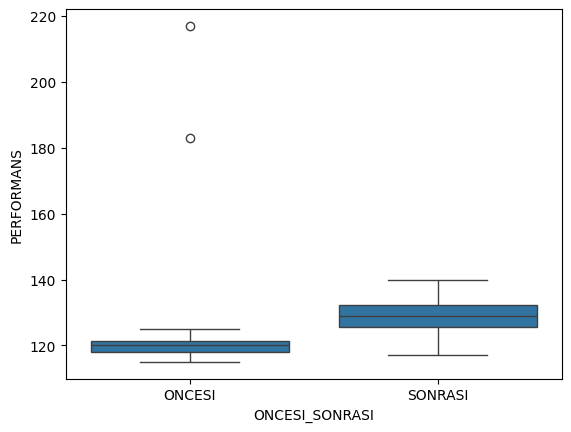

In [37]:
sns.boxplot(x="ONCESI_SONRASI",y="PERFORMANS",data=BIRLIKTE)

# Varsayım Kontrolleri

In [38]:
from scipy.stats import shapiro

In [49]:
from scipy.stats import levene

In [43]:
statistic,p_value=shapiro(AYRIK.ONCESI)

In [46]:
print("p_value=%.4f" % (p_value))

p_value=0.0000


In [47]:
statistic,p_value=shapiro(AYRIK.SONRASI)

In [48]:
print("p_value=%.4f" % (p_value))

p_value=0.6160


In [51]:
levene(AYRIK.ONCESI,AYRIK.SONRASI)

LeveneResult(statistic=0.545714149731093, pvalue=0.4622913193433734)

# Hipotez Testi

In [53]:
from scipy.stats import ttest_rel

In [59]:
test_istatistigi,p_value=ttest_rel(AYRIK.ONCESI,AYRIK.SONRASI)

In [60]:
print("Test istatistiği=%.4f , p_value=%.4f" % (test_istatistigi,p_value))

Test istatistiği=-1.6888 , p_value=0.0992


In [ ]:
#Benim kurmuş olduğum modelde H0 hipotezi kabul edilir ancak normal varsayım kontrolünde önce değerde normal olmadığı sonucuna varılmıştır. Bu nedenle bu testi kullanmak  doğru olmamaktadır.

# NON PARAMETRİK BAĞIMLI İKİ ÖRNEKLEM TESTİ

In [61]:
from scipy.stats import wilcoxon


In [65]:
test_istatistigi,p_value=wilcoxon(AYRIK.ONCESI,AYRIK.SONRASI)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [66]:
print("Test istatistiği=%.4f , p_value=%.4f" % (test_istatistigi,p_value))

Test istatistiği=81.5000 , p_value=0.0000
